# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json 

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)



590

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
city = "banmo"
query_url = url + "appid=" + api_key + "&q=" + city
weather_response = requests.get(query_url)
weather_json = weather_response.json()
print(json.dumps(weather_json, indent=4, sort_keys=True))


{
    "cod": "404",
    "message": "city not found"
}


In [4]:
url = "http://api.openweathermap.org/data/2.5/weather?"
print("Beginning Data Retrieval")
print("--------------------------------")
for city in cities:
    query_url = url + "appid=" + api_key + "&q=" + city
    try:
        weather_response = requests.get(query_url)
        weather_json = weather_response.json()
        print(f"Processing Record {cities.index(city)}  | {city}")
    except:
        print("City not found. Skipping......")
        continue

Beginning Data Retrieval
--------------------------------
Processing Record 0  | pontianak
Processing Record 1  | vaini
Processing Record 2  | busselton
Processing Record 3  | hasaki
Processing Record 4  | luwuk
Processing Record 5  | sumenep
Processing Record 6  | taolanaro
Processing Record 7  | east london
Processing Record 8  | albany
Processing Record 9  | porto novo
Processing Record 10  | samusu
Processing Record 11  | hilo
Processing Record 12  | sao felix do xingu
Processing Record 13  | ondangwa
Processing Record 14  | macapa
Processing Record 15  | barao de melgaco
Processing Record 16  | san cristobal
Processing Record 17  | rikitea
Processing Record 18  | namibe
Processing Record 19  | mount isa
Processing Record 20  | ballitoville
Processing Record 21  | tsihombe
Processing Record 22  | kesennuma
Processing Record 23  | honningsvag
Processing Record 24  | sabang
Processing Record 25  | mudyuga
Processing Record 26  | upernavik
Processing Record 27  | tabuk
Processing Reco

Processing Record 238  | luis correia
Processing Record 239  | laje
Processing Record 240  | krasnoselkup
Processing Record 241  | opuwo
Processing Record 242  | itoman
Processing Record 243  | tuggurt
Processing Record 244  | shamgarh
Processing Record 245  | victoria
Processing Record 246  | zhigalovo
Processing Record 247  | korla
Processing Record 248  | codrington
Processing Record 249  | cap malheureux
Processing Record 250  | faanui
Processing Record 251  | stoyba
Processing Record 252  | trofors
Processing Record 253  | pierre
Processing Record 254  | vero beach
Processing Record 255  | tucuman
Processing Record 256  | xingcheng
Processing Record 257  | vucje
Processing Record 258  | lindi
Processing Record 259  | lebu
Processing Record 260  | klaksvik
Processing Record 261  | doka
Processing Record 262  | haapiti
Processing Record 263  | talcahuano
Processing Record 264  | attawapiskat
Processing Record 265  | saint-joseph
Processing Record 266  | solton
Processing Record 267 

Processing Record 479  | qufu
Processing Record 480  | point pedro
Processing Record 481  | isabela
Processing Record 482  | yar-sale
Processing Record 483  | aswan
Processing Record 484  | lata
Processing Record 485  | kahului
Processing Record 486  | comodoro rivadavia
Processing Record 487  | burgersdorp
Processing Record 488  | boende
Processing Record 489  | riverton
Processing Record 490  | bumba
Processing Record 491  | roblin
Processing Record 492  | tamana
Processing Record 493  | vernon
Processing Record 494  | saverne
Processing Record 495  | lunino
Processing Record 496  | terme
Processing Record 497  | strezhevoy
Processing Record 498  | garmsar
Processing Record 499  | muzhi
Processing Record 500  | samfya
Processing Record 501  | molokovo
Processing Record 502  | gushikawa
Processing Record 503  | hovin
Processing Record 504  | caucaia
Processing Record 505  | henties bay
Processing Record 506  | queanbeyan
Processing Record 507  | cruden bay
Processing Record 508  | maw

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:

# cities = [city.capitalize() for city in cities]
city_df = pd.DataFrame(np.array(cities))
city_df.columns =["City"] 
city_df['Cloudiness'] = ""
city_df['Country'] = ""
city_df['Date'] = ""
city_df['Humidity'] = ""
city_df['Lat'] = ""
city_df['Lng'] = ""
city_df['Max Temp'] = ""
city_df['Wind Speed'] = ""
city_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,pontianak,,,,,,,,
1,vaini,,,,,,,,
2,busselton,,,,,,,,
3,hasaki,,,,,,,,
4,luwuk,,,,,,,,


In [6]:

for index,row in city_df.iterrows():
    city = row['City']
    query_url = url + "appid=" + api_key + "&q=" + city
    try:
        make_request = requests.get(query_url)
        json_response = make_request.json()
        city_df.loc[index, "Cloudiness"] = json_response["clouds"]["all"]
        city_df.loc[index, "Country"] = json_response["sys"]["country"]
        city_df.loc[index, "Date"] = json_response["dt"]
        city_df.loc[index, "Humidity"] = json_response["main"]["humidity"]
        city_df.loc[index, "Lat"] = json_response["coord"]["lat"]
        city_df.loc[index, "Lng"] = json_response["coord"]["lon"]
        city_df.loc[index, "Max Temp"] = json_response["main"]["temp_max"]
        city_df.loc[index, "Wind Speed"] = json_response["wind"]["speed"]
    except:
        city_df.loc[index, "Cloudiness"] = "NaN"
        city_df.loc[index, "Country"] = "NaN"
        city_df.loc[index, "Date"] = "NaN"
        city_df.loc[index, "Humidity"] = "NaN"
        city_df.loc[index, "Lat"] = "NaN"
        city_df.loc[index, "Lng"] = "NaN"
        city_df.loc[index, "Max Temp"] = "NaN"
        city_df.loc[index, "Wind Speed"] = "NaN"
        continue

city_df.head()


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,pontianak,75,ID,1553704200,88,-0.02,109.34,300.15,1.81
1,vaini,0,IN,1553709361,88,15.34,74.49,295.708,1.56
2,busselton,56,AU,1553709356,48,-33.64,115.35,288.15,7.36
3,hasaki,40,JP,1553709277,58,35.73,140.83,288.15,7.7
4,luwuk,48,ID,1553709362,100,-0.95,122.79,298.708,1.06


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

In [7]:
print(city_df.count())
print(city_df.dtypes)

City          590
Cloudiness    590
Country       590
Date          590
Humidity      590
Lat           590
Lng           590
Max Temp      590
Wind Speed    590
dtype: int64
City          object
Cloudiness    object
Country       object
Date          object
Humidity      object
Lat           object
Lng           object
Max Temp      object
Wind Speed    object
dtype: object


In [8]:
cols = ['Cloudiness', 'Humidity', 'Lat','Lng','Max Temp','Wind Speed']
city_df[cols] = city_df[cols].apply(pd.to_numeric, errors='coerce', axis=1)
city_df.dtypes

City           object
Cloudiness    float64
Country        object
Date           object
Humidity      float64
Lat           float64
Lng           float64
Max Temp      float64
Wind Speed    float64
dtype: object

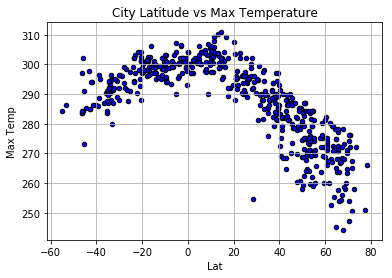

In [9]:
city_df.plot(kind="scatter", x="Lat", y="Max Temp", marker="o", color="blue", edgecolors="black", grid=True,  title=("City Latitude vs Max Temperature"))

#### Latitude vs. Humidity Plot

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
443,paita,75.0,PE,1553706000,290.0,-5.09,-81.11,290.15,4.01


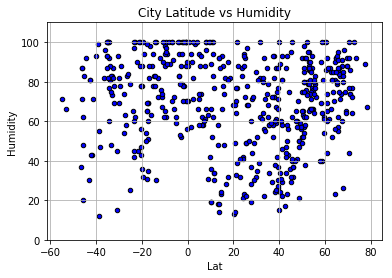

In [18]:
city_df.plot(kind="scatter", x="Lat", y="Humidity", ylim = (0,110), marker="o", color="blue", edgecolors="black", grid=True,  title=("City Latitude vs Humidity"))
city_df.loc[city_df["Humidity"] > 250]


#### Latitude vs. Cloudiness Plot

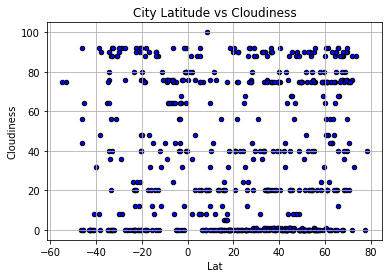

In [27]:
city_df.plot(kind="scatter", x="Lat", y="Cloudiness", marker="o", color="blue", edgecolors="black", grid=True,  title=("City Latitude vs Cloudiness"))

#### Latitude vs. Wind Speed Plot

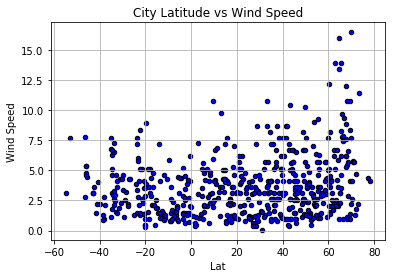

In [28]:
city_df.plot(kind="scatter", x="Lat", y="Wind Speed", marker="o", color="blue", edgecolors="black", grid=True,  title=("City Latitude vs Wind Speed"))